# Eyesense

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array


## DataFrame Analysis

In [2]:
df = pd.read_csv("/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/full_df.csv")

### General information about the data

In [3]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br>The dataset has **6392** entries of pictures and diagnosis and **4784** indicating that not all patients have pictures for both eyes.</br>
<br>The ages vary between 1 and 91 years old.</br>
<br>Annotations were labeled by trained human readers with quality control management. They classify patients into eight labels, including:</br>

- Normal (N),
- Diabetes (D),
- Glaucoma (G),
- Cataract (C),
- Age related Macular Degeneration (A),
- Hypertension (H),
- Pathological Myopia (M),
- Other diseases/abnormalities (O)

In [4]:
df.sort_values("ID").head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg
3195,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_left.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3196,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3_left.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
3197,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",4_left.jpg
3198,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_left.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

> There are no null values in the DataFrame.

### Data distribution plots

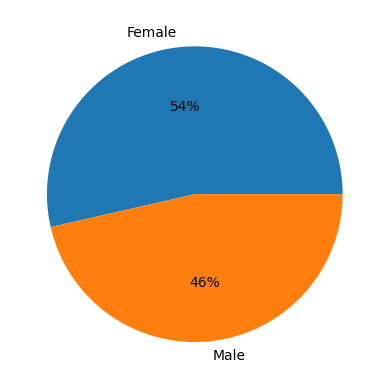

In [123]:
plt.pie(df["Patient Sex"].value_counts(), labels=['Female', 'Male'] ,autopct='%.0f%%')
plt.show()

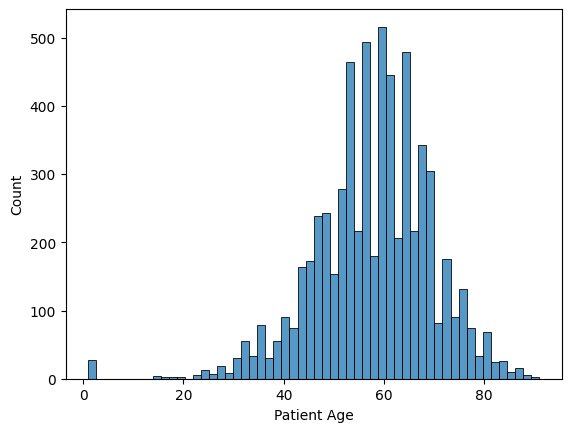

In [7]:
sns.histplot(df["Patient Age"]);

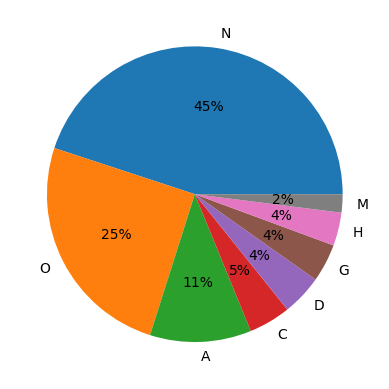

In [124]:
plt.pie(df['labels'].value_counts(), labels=['N', 'O', 'A', 'C', 'D', 'G', 'H', 'M'] ,autopct='%.0f%%')
plt.show()

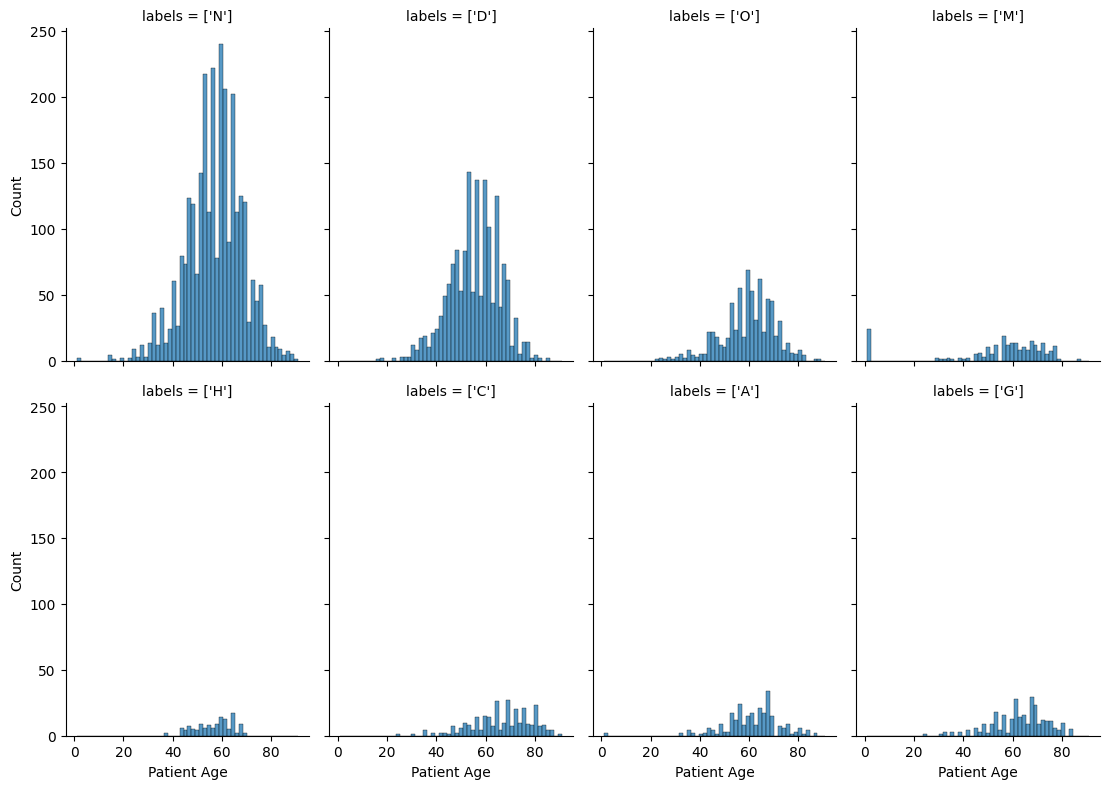

In [9]:
sns.displot(df, x="Patient Age", col="labels", height=4, aspect=.7, col_wrap=4)

In [10]:
df[df['Patient Age'] <= 15].groupby("Patient Age")["labels"].value_counts()

Patient Age  labels
1            ['M']     24
             ['A']      2
             ['N']      2
14           ['N']      2
15           ['N']      2
Name: count, dtype: int64

> The most common diseases in patients with age smaller than 15 is Pathological Myopia (M).

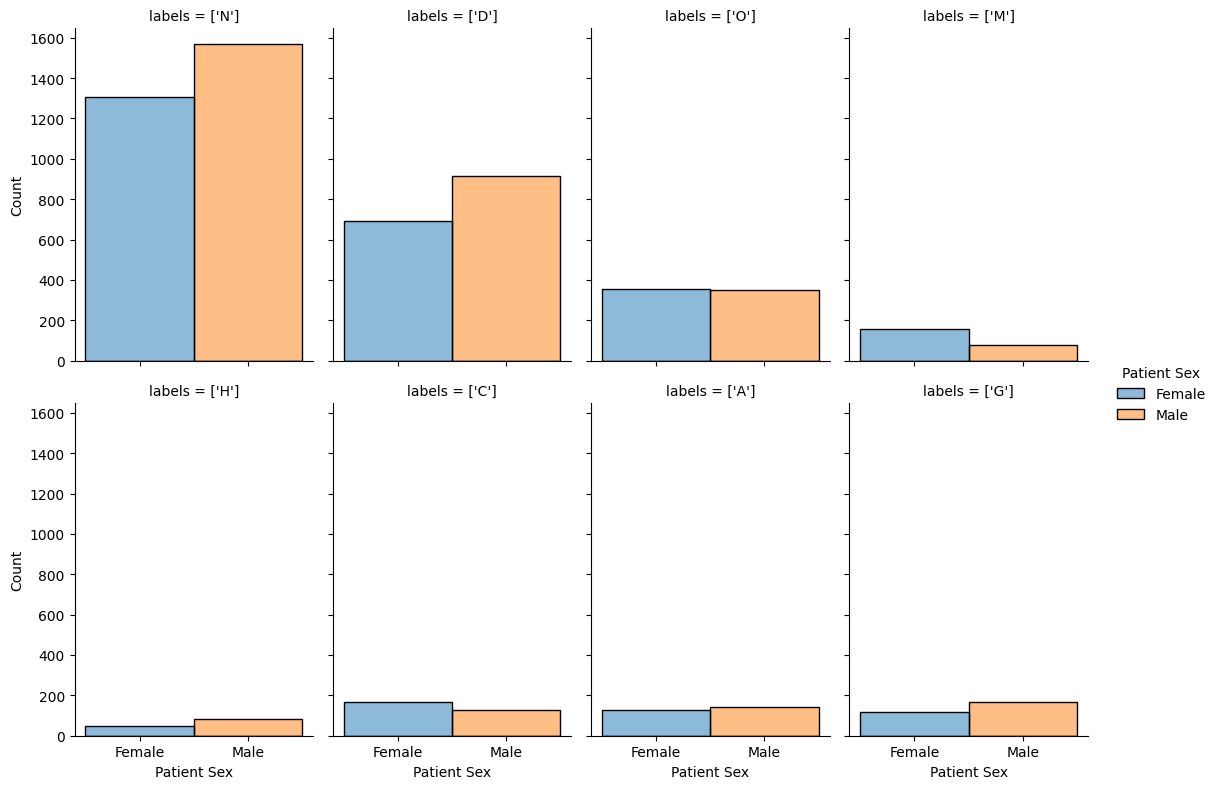

In [11]:
sns.displot(df, x="Patient Sex", col="labels", hue="Patient Sex", height=4, aspect=.7, col_wrap=4)

<Axes: >

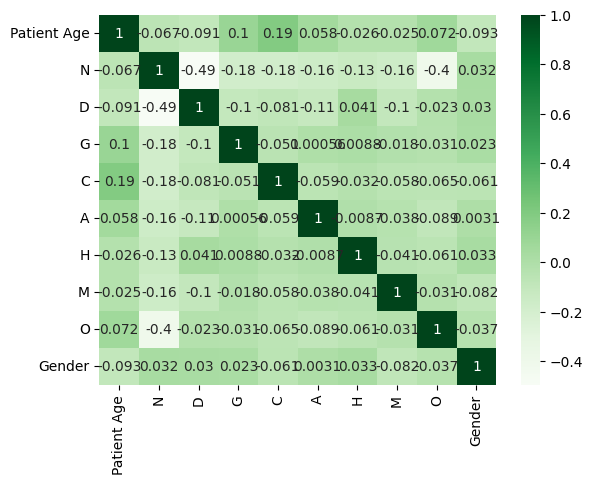

In [12]:
from sklearn.preprocessing import LabelEncoder

df["Gender"] = LabelEncoder().fit_transform(df["Patient Sex"])

matrix = df.select_dtypes(include=[np.number]).drop(columns='ID').corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [13]:
df=df.drop(columns='Gender')

> The biggest correlations found were between the patient's age and Cataract, Glaucoma.

## Images analysis

### Load the images form the different folders given in a list of images

In [14]:
path_train = "/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images"
path_test = "/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Testing Images"
path_preproc = "/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/preprocessed_images"

img_list_train = os.listdir(path_train)
img_list_test = os.listdir(path_test)
img_list_preproc = os.listdir(path_preproc)

#img_dict = {img.strip(".jpg"): image.load_img(os.path.join(path, img)) for img in img_list}


In [15]:
#img_train = [image.load_img(os.path.join(path_train, img)) for img in img_list_train]
#img_test = [image.load_img(os.path.join(path_test, img)) for img in img_list_test]
#img_preproc = [image.load_img(os.path.join(path_preproc, img)) for img in img_list_preproc]

In [16]:
#plt.imshow(img_preproc[10])

In [17]:
#tmp = 0
#for i in range(len(img_train)):
#    tmp = tmp + img_train[i].size[0]
#avg_size_lines = tmp/len(img_train)

In [18]:
#avg_size_lines

In [19]:
#tmp = 0
#for i in range(len(img_train)):
#    tmp = tmp + img_train[i].size[1]
#avg_size_col = tmp/len(img_train)

In [20]:
#avg_size_col

As imagens do conjunto de treinamento possuem tamanho médio de (2465, 1807)

In [21]:
#tmp = 0
#for i in range(len(img_test)):
#    tmp = tmp + img_test[i].size[0]
#avg_size_lines = tmp/len(img_test)

In [22]:
#avg_size_lines

In [23]:
#tmp = 0
#for i in range(len(img_train)):
#    tmp = tmp + img_train[i].size[1]
#avg_size_col = tmp/len(img_train)

In [24]:
#avg_size_col

As imagens do conjunto de teste possuem tamanho médio de (2520, 1807)

In [25]:
#tmp = 0
#for i in range(len(img_preproc)):
#    tmp = tmp + img_preproc[i].size[0]
#avg_size_lines = tmp/len(img_preproc)

In [26]:
#avg_size_lines

In [27]:
#tmp = 0
#for i in range(len(img_preproc)):
#    tmp = tmp + img_preproc[i].size[1]
#avg_size_col = tmp/len(img_preproc)

In [28]:
#avg_size_col

As imagens do conjunto preprocessado possuem tamanho médio de (512, 512)

### Associate the images to the correspondent row in the DataFrame

In [29]:
image_size = (256, 256)
df['images'] = df['filename'].apply(lambda x: image.load_img(os.path.join(path_preproc, x), target_size=image_size))

In [30]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,images
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...


### Associate the tensors to the correspondent row in the DataFrame.

In [31]:
#df['tensor images'] = df['images'].apply(lambda x: tf.convert_to_tensor(img_to_array(x)))

In [32]:
#df

## PCA analysis

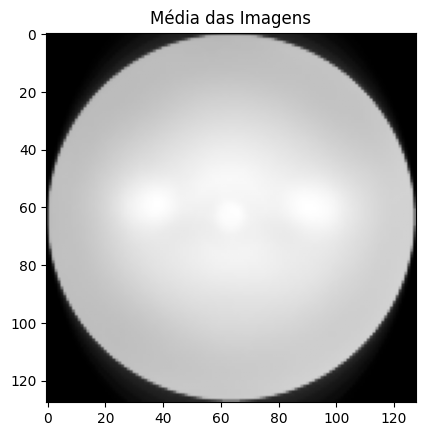

In [127]:
import cv2

imgs = []
for img_name in os.listdir(path_preproc):
    img_path = os.path.join(path_preproc, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Converter para grayscale
    img = cv2.resize(img, (128, 128))  # Redimensionar para um tamanho fixo
    imgs.append(img)

# Calcular média
mean_img = np.mean(imgs, axis=0)

# Exibir imagem média
plt.imshow(mean_img, cmap='gray')
plt.title("Média das Imagens")
plt.show()

In [34]:
img_to_array(df['images'][0]).shape

(256, 256, 3)

In [35]:
img_to_array(df['images'][0]).flatten().shape

(196608,)

In [36]:
#features = df['images'].apply(lambda x: img_to_array(x).flatten())

In [37]:
def process_images(df, batch_size=500):
    """
    Converte imagens para arrays achatados em batches para reduzir uso de memória.
    """
    num_images = len(df)
    batch_features = []

    for i in range(0, num_images, batch_size):
        batch = df['images'][i:i+batch_size]  # Seleciona um lote de imagens
        batch_processed = [img_to_array(img).flatten() for img in batch]
        batch_features.append(np.array(batch_processed, dtype=np.float16))  # Converte para NumPy array

    return np.vstack(batch_features)  # Junta os batches em um único array grande

In [38]:
X = process_images(df, batch_size=150)
print(f"Formato correto de X: {X.shape}")

Formato correto de X: (6392, 196608)


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) 
X_pca = pca.fit_transform(X)

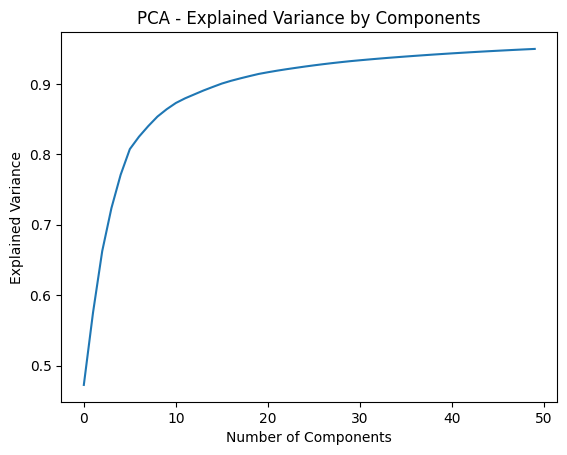

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA - Explained Variance by Components")

plt.show()

In [44]:
pca.components_.shape

(50, 196608)

In [53]:
y = df['labels']

## Naive model with KNN

### Cross-validate and n-neighbors search

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

acc_n = {}
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    mean_acc = cross_val_score(knn, X=X_pca, y=y, scoring='accuracy', cv=5).mean()
    acc_n[n] = mean_acc

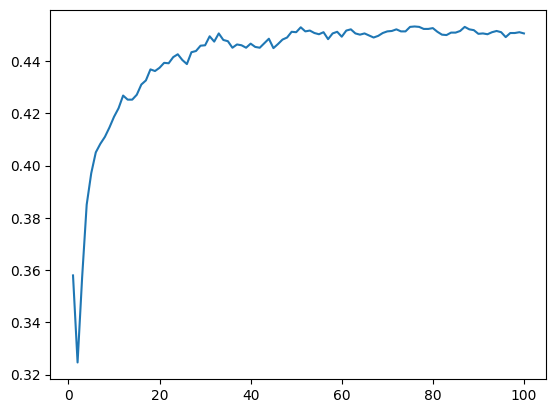

In [79]:
plt.plot(acc_n.keys(), acc_n.values())

In [102]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsClassifier(n_neighbors=35), X=X_pca, y=y, cv=5, scoring='accuracy')

In [103]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

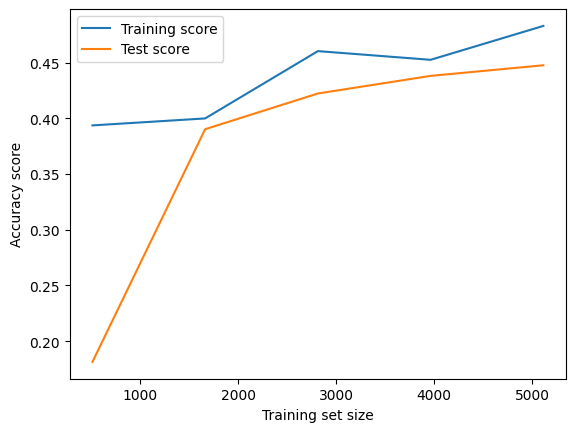

In [104]:
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

> Number of neigbohrs that improve accuracy: **35**

### Hold-out validation

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [114]:
knn = KNeighborsClassifier(n_neighbors=35)  # Teste diferentes valores de K
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [115]:
y_pred = knn.predict(X_test)

In [116]:
y_pred

array(["['N']", "['N']", "['N']", ..., "['N']", "['N']", "['N']"],
      dtype=object)

In [117]:
from sklearn.metrics import accuracy_score
print(f"Acurácia do KNN: {accuracy_score(y_test, y_pred):.3f}")

Acurácia do KNN: 0.453


### Confusion matrix analysis